# CoreMS Assignments to Angus Alcoseal 1060 24

`CoreMS` framework for mass spectrum


### 1. Import Data File


In [4]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [5]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_3sigma_101221.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks
9: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks
10: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1061_01_02_sum250_3sigma.pks

### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.

#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"signal_noise"`, and the minimum is set to `6` (default=6). The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.

The total number of peaks (92,307) is illustrated with `len(mass_spectrum)`.

In [6]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "signal_noise"
MSParameters.mass_spectrum.noise_threshold_min_s2n = 4

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Set Kendrick base
kb = {"C": 3, "H": 5, "N": 1, "O": 1}
MSParameters.ms_peak.kendrick_base = kb

# Specify file path
file_location = filepaths[9]
print(f"file locations: {file_location}")

file locations: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks


30897


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

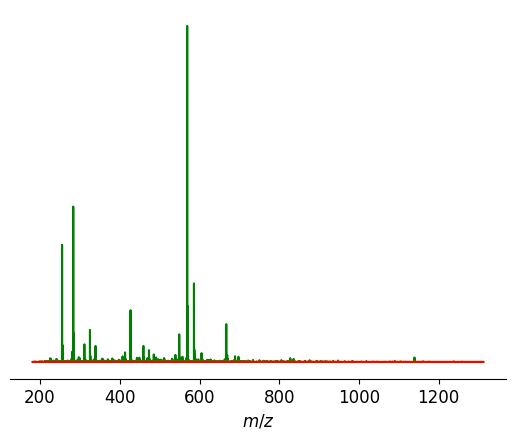

In [7]:
mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_profile_and_noise_threshold()

### 3. Access mass spectrum peak objects


In [8]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 569.0785293 m/z | 100.0000 abundance | 1101630.0 resolving power | 87158.0 S/N | -0.7812 KMD
2: 283.2642567 m/z | 46.2210 abundance | 2478099.0 resolving power | 40285.0 S/N | -0.1163 KMD
3: 255.2329491 m/z | 34.8740 abundance | 2803466.0 resolving power | 30395.1 S/N | -0.0996 KMD
4: 586.0397229 m/z | 23.3650 abundance | 1127830.0 resolving power | 20364.1 S/N | -0.7335 KMD
5: 570.0818810 m/z | 16.6660 abundance | 1153345.0 resolving power | 14525.3 S/N | -0.7840 KMD
6: 426.9678855 m/z | 15.3940 abundance | 1629020.0 resolving power | 13416.0 S/N | -0.7448 KMD
7: 667.0459147 m/z | 11.2560 abundance | 972305.0 resolving power | 9810.0 S/N | -0.6974 KMD
8: 325.1842895 m/z | 9.5270 abundance | 2419756.0 resolving power | 8302.3 S/N | -0.0144 KMD
9: 284.2676109 m/z | 8.5610 abundance | 2383490.0 resolving power | 7460.5 S/N | -0.1191 KMD
10: 549.0722982 m/z | 8.2020 abundance | 1209971.0 resolving power | 7147.5 S/N | -0.7854 KMD
11: 569.0639331 m/z | 7.09

In [9]:
print(f"Kendrick base: {mass_spectrum.mspeaks_settings.kendrick_base}")


Kendrick base: {'C': 3, 'H': 5, 'N': 1, 'O': 1}


### 4. Molecular formula search
The formula database isn't built until the `SearchMolecularFormulas` method is run.

See [database_initialization.md](/home/corems/docs/user_guide/database_initialization.md) and [molecular_formula_search.md](/home/corems/docs/user_guide/molecular_formula_search.md) for details about the molecular formula database and search process. Both database initialization and molecular formula searching rely establishing the relevant heteroatom space.

Numerous parameters can be set to facilitate the molecular search process, including element number and element ratio constraints, and ppm and isotope abundance error constraints. Many of these constraints are illustrated below. In the following example, `first_hit = False`, meaning that peaks aren't skipped when a molecular formula has already been assigned.

In [10]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas

# Ion Types
mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isAdduct = False

# Atom constraints
mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 100)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)   # Max H for C100 is 202
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 4)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 30)
# mass_spectrum.molecular_search_settings.usedAtoms["P"] = (0, 1)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass error constraints
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -0.2   # Bahureksa paper 0.4
mass_spectrum.molecular_search_settings.max_ppm_error = 0.2

# DBE constraints - Can always throw out high Mod AI (> 0.5 = aromatic and > 0.67 = condensed aromatic)
mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 66   # Max DBE 66 for C100 (empirical Max DBE = 2C/3)

# H/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_hc_filter = 0.2
mass_spectrum.molecular_search_settings.max_hc_filter = 3.1

# O/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_oc_filter = 0
mass_spectrum.molecular_search_settings.max_oc_filter = 1.2

# O/P ratio constraints
# mass_spectrum.molecular_search_settings.min_op_filter = 2

# Isotope abundance constraints
mass_spectrum.molecular_search_settings.min_abun_error = -15
mass_spectrum.molecular_search_settings.max_abun_error = 15


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)


'runworker'  486.37 ms


Loading molecular formula database: 712398it [00:45, 15700.78it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 10}, (de)protonated : 100%|██████████| 300/300 [00:50<00:00,  5.95it/s]
Loading molecular formula database: 319956it [00:23, 13497.55it/s]
Started molecular formula search for class {"N": 4, "S": 2, "O": 30}, (de)protonated : 100%|██████████| 150/150 [00:23<00:00,  6.35it/s]


'run_molecular_formula'  144929.17 ms
10487 assigned peaks and 20410 unassigned peaks, total  = 33.94 %, relative abundance = 53.13 %, RMS error (best candidate) (ppm) = 0.098


(10487, 20410, 33.941806647894616, 53.13230301735445, 0.09786250029084974)

### 5. Visualizing Results

The tools for exploring and visualizing molecular formula assignment results are primarily contained in `HeteroatomsClassification`, consistent with the use of heteroatom space to define search space.

<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

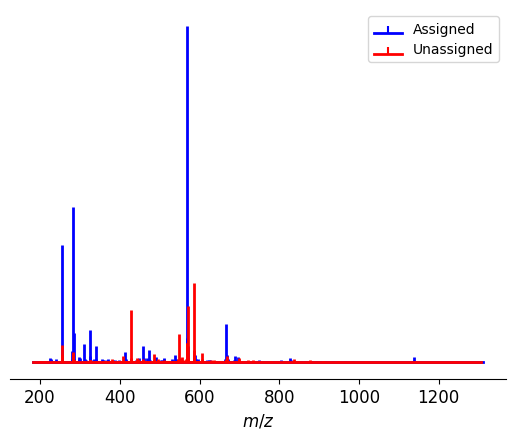

In [11]:
from corems.molecular_id.factory.classification import HeteroatomsClassification

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### 6. Exploring Mass Spectrum

In [18]:
for mspeaks in mass_spectrum.sort_by_abundance(reverse=True)[:20]:
    for mf in mspeaks:
        print(f"Abundance: {mspeaks.abundance:.2f} | "
                f"Exp m/z: {mspeaks.mz_exp:.7f} | "
              f"calc m/z: {mf.mz_calc:.6f} | "
              f"Error: {mf.mz_error:.6f} | "
              f"DBE: {mf.dbe} | "
              f"H/C: {mf.H_C:.6f} | "
              f"O/C: {mf.O_C:.6f} | "
              f"AI mod: {mf.A_I_mod:.6f} | "
              f"KMD: {mf.kmd:.4f} | "
              f"Class: {mf.class_label} | "
              f"Formula: {mf.string_formated}")

Abundance: 100.00 | Exp m/z: 569.0785293 | calc m/z: 569.078423 | Error: 0.187163 | DBE: 13.0 | H/C: 0.956522 | O/C: 0.739130 | AI mod: 0.310345 | KMD: -0.7811 | Class: O17 | Formula: C₂₃H₂₂O₁₇
Abundance: 46.22 | Exp m/z: 283.2642567 | calc m/z: 283.264254 | Error: 0.009718 | DBE: 1.0 | H/C: 2.000000 | O/C: 0.111111 | AI mod: 0.000000 | KMD: -0.1163 | Class: O2 | Formula: C₁₈H₃₆O₂
Abundance: 34.87 | Exp m/z: 255.2329491 | calc m/z: 255.232954 | Error: -0.018486 | DBE: 1.0 | H/C: 2.000000 | O/C: 0.125000 | AI mod: 0.000000 | KMD: -0.0996 | Class: O2 | Formula: C₁₆H₃₂O₂
Abundance: 11.26 | Exp m/z: 667.0459147 | calc m/z: 667.045941 | Error: -0.039264 | DBE: 39.0 | H/C: 0.272727 | O/C: 0.181818 | AI mod: 0.875000 | KMD: -0.6974 | Class: O8 | Formula: C₄₄H₁₂O₈
Abundance: 9.53 | Exp m/z: 325.1842895 | calc m/z: 325.184290 | Error: -0.000147 | DBE: 4.0 | H/C: 1.666667 | O/C: 0.166667 | AI mod: 0.096774 | KMD: -0.0144 | Class: S1 O3 | Formula: C₁₈H₃₀O₃S₁
Abundance: 8.56 | Exp m/z: 284.2676109

We are using S/N = 4, so first peak in original dataset is missing.

In [19]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_mz()[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 181.1769834 m/z | 0.0060 abundance | 5594307.0 resolving power | 4.0 S/N | -0.0823 KMD
2: 181.1840790 m/z | 0.0060 abundance | 3936206.0 resolving power | 4.2 S/N | -0.0894 KMD
3: 181.1883608 m/z | 0.0060 abundance | 4380904.0 resolving power | 4.1 S/N | -0.0937 KMD
4: 181.2010242 m/z | 0.0060 abundance | 5531201.0 resolving power | 4.3 S/N | -0.1064 KMD
5: 181.2131007 m/z | 0.0070 abundance | 3756183.0 resolving power | 4.8 S/N | -0.1184 KMD
6: 181.2396090 m/z | 0.0060 abundance | 4159952.0 resolving power | 4.6 S/N | -0.1449 KMD
7: 181.2399706 m/z | 0.0060 abundance | 3483118.0 resolving power | 4.3 S/N | -0.1453 KMD
8: 181.2413638 m/z | 0.0060 abundance | 5387662.0 resolving power | 4.2 S/N | -0.1467 KMD
9: 181.2422963 m/z | 0.0070 abundance | 5172219.0 resolving power | 5.0 S/N | -0.1476 KMD
10: 181.2445090 m/z | 0.0060 abundance | 3118225.0 resolving power | 4.1 S/N | -0.1498 KMD
11: 181.2466921 m/z | 0.0060 abundance | 5309217.0 resolving power | 

### 7. Exporting Molecular Formula Results

In [20]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "Angus_Alcoseal_1060_24_CoreMS.csv"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,C,H,O,N,S,13C,15N,18O,33S,34S
0,124,183.113887,183.113887,183.113901,0.007,NaN,6944554.0,4.833,-1,-0.077063,...,9.0,16.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,227,185.009194,185.009194,185.009161,0.006,NaN,2156540.0,4.693,-1,0.177513,...,7.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,245,185.154704,185.154704,185.154703,0.006,NaN,1224704.0,4.366,-1,0.000022,...,11.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333,186.989320,186.989320,186.989295,0.006,NaN,7227902.0,4.404,-1,0.133198,...,7.0,8.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,344,187.108810,187.108810,187.108816,0.020,NaN,1022759.0,16.379,-1,-0.030094,...,8.0,16.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.sort_values(by=["Peak Height"], ascending=False).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,C,H,O,N,S,13C,15N,18O,33S,34S
6926,22178,569.078529,569.078529,569.078423,100.000,NaN,1101630.0,87158.004,-1,0.187163,...,23.0,22.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,5527,283.264257,283.264257,283.264254,46.221,NaN,2478099.0,40284.976,-1,0.009718,...,18.0,36.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,3429,255.232949,255.232949,255.232954,34.874,NaN,2803466.0,30395.108,-1,-0.018486,...,16.0,32.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27276,23214,586.039723,586.039723,NaN,23.365,NaN,1127830.0,20364.085,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26616,22317,570.081881,570.081881,NaN,16.666,NaN,1153345.0,14525.311,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20830,13603,426.967886,426.967886,NaN,15.394,NaN,1629020.0,13415.977,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8041,25799,667.045915,667.045915,667.045941,11.256,NaN,972305.0,9810.024,-1,-0.039264,...,44.0,12.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1387,7718,325.184289,325.184289,325.184290,9.527,NaN,2419756.0,8302.288,-1,-0.000147,...,18.0,30.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
675,5641,284.267611,284.267611,284.267609,8.561,NaN,2383490.0,7460.456,-1,0.007450,...,17.0,36.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
25669,20993,549.072298,549.072298,NaN,8.202,NaN,1209971.0,7147.458,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.sort_values(by=["m/z"], ascending=True).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,C,H,O,N,S,13C,15N,18O,33S,34S
10890,0,181.176983,181.176983,NaN,0.006,NaN,5594307.0,4.010,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10891,1,181.184079,181.184079,NaN,0.006,NaN,3936206.0,4.186,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10892,2,181.188361,181.188361,NaN,0.006,NaN,4380904.0,4.073,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10893,3,181.201024,181.201024,NaN,0.006,NaN,5531201.0,4.264,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10894,4,181.213101,181.213101,NaN,0.007,NaN,3756183.0,4.762,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10895,5,181.239609,181.239609,NaN,0.006,NaN,4159952.0,4.619,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10896,6,181.239971,181.239971,NaN,0.006,NaN,3483118.0,4.263,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10897,7,181.241364,181.241364,NaN,0.006,NaN,5387662.0,4.192,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10898,8,181.242296,181.242296,NaN,0.007,NaN,5172219.0,5.032,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10899,9,181.244509,181.244509,NaN,0.006,NaN,3118225.0,4.101,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`mass_spectrum.to_csv` and `mass_spectrum.to_dataframe` produce tables with the following columns.

In [11]:
for col in df.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
C
H
O
N
S
13C
15N
18O
33S
34S


In [12]:
from corems.mass_spectrum.output.export import HighResMassSpecExport

# Create an export instance
# You need to provide an output file path (even though we're just getting a DataFrame)
# Create output paths for different formats
csv_file = exports_dir / "Angus_Alcoseal_1060_24_CoreMS_plus.csv"

exporter = HighResMassSpecExport(csv_file, mass_spectrum, output_type="pandas")

# If you want additional columns (like Aromaticity Index)
df_with_extras = exporter.get_pandas_df(additional_columns=["Aromaticity Index"])

In [13]:
df_with_extras.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,C,H,O,N,S,13C,15N,18O,33S,34S
0,124,183.113887,183.113887,183.113901,0.007,NaN,6944554.0,4.833,-1,-0.077063,...,9.0,16.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,227,185.009194,185.009194,185.009161,0.006,NaN,2156540.0,4.693,-1,0.177513,...,7.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,245,185.154704,185.154704,185.154703,0.006,NaN,1224704.0,4.366,-1,0.000022,...,11.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333,186.989320,186.989320,186.989295,0.006,NaN,7227902.0,4.404,-1,0.133198,...,7.0,8.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,344,187.108810,187.108810,187.108816,0.020,NaN,1022759.0,16.379,-1,-0.030094,...,8.0,16.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for col in df_with_extras.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
Aromaticity Index
C
H
O
N
S
13C
15N
18O
33S
34S
